In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn库简介

## 什么是seaborn？

Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。

Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。同时它能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式。

## 为什么使用seaborn？

Seaborn是一种基于matplotlib的图形可视化库。他提前已经定义好了一套自己的风格，也封装了一系列的方便的绘图函数。如果使用matplotlib，想要绘制精美的图形需要大量的调优代码才能完成，使用seaborn可能就是一行代码的事情。总结一句话：使用seaborn绘图比matplotlib更好看，更简单！

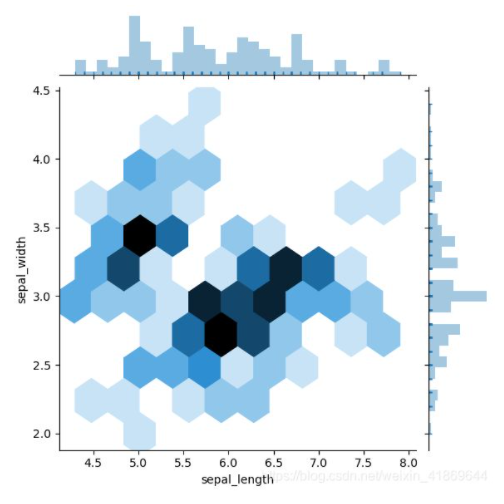

# 关系绘图：relplot

## 基本使用

## 添加hue参数

## 添加col和row参数

## 指定具体的列

## 绘制折线图

# 分类绘图：catplot

## 分类散点图

### stripplot

### swarmplot

### 横向分类散点图

## 分类分布图

### 箱型图：boxplot

### 小提琴图：violinplot

## 分类统计图

### 柱状图：barplot

### 计数图：countplot

### 点线图：pointplot

# 分布绘图

## 单变量分布：distplot

## 多变量分布：jointplot

### 散点图

### 六边形图

## 成对绘图：pairplot

# 线性关系绘图

# FacetGrid结构图

## 普通的Axes绘图

## FacetGrid基本使用

### 绘制多个图形

### 添加颜色观察字段

### 设置每个图形的尺寸

### 设置图例

### 设置标题

### 设置坐标轴

# seaborn配置

## 样式风格设置

### 自带的样式

### 风格设置函数

## 调色盘设置

### 定性调色盘

#### 默认调色盘

#### hls圆形颜色系统

#### 分类颜色

#### 用xkcd颜色

### 连续颜色盘

### 离散调色盘